<a href="https://colab.research.google.com/github/DanielaNavaGarcia/Ecuaciones-Diferenciales-Parciales-I/blob/main/Membrana_vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

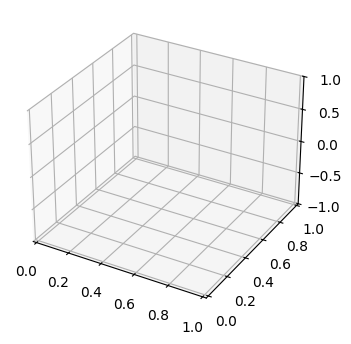

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import dblquad

# Parámetros físicos
a, b = 4, 2         # dimensiones de la membrana
c = 1               # velocidad de propagación de la onda
N = 10              # número de términos en la serie
t_vals = np.linspace(0, 5, 100)  # tiempos a evaluar

# Función inicial
def f(x, y):
    return 0.1 * (4*x - x**2) * (2*y - y**2)

# Cálculo de coeficientes A_mn
def A_mn(m, n):
    integrand = lambda y, x: f(x, y) * np.sin(m * np.pi * x / a) * np.sin(n * np.pi * y / b)
    result, _ = dblquad(integrand, 0, a, lambda x: 0, lambda x: b)
    return (4 / (a * b)) * result

# Dominio espacial
x_vals = np.linspace(0, a, 50)
y_vals = np.linspace(0, b, 50)
X, Y = np.meshgrid(x_vals, y_vals)

# Precomputar A_mn
A = np.zeros((N+1, N+1))
for m in range(1, N+1):
    for n in range(1, N+1):
        A[m, n] = A_mn(m, n)

# Función de solución u(x, y, t)
def u(X, Y, t):
    result = np.zeros_like(X)
    for m in range(1, N+1):
        for n in range(1, N+1):
            lambda_mn = c * np.pi * np.sqrt((m/a)**2 + (n/b)**2)
            result += A[m, n] * np.sin(m*np.pi*X/a) * np.sin(n*np.pi*Y/b) * np.cos(lambda_mn * t)
    return result

# Graficar animación de la membrana
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1, 1)

def update(t):
    ax.clear()
    ax.set_zlim(-1, 1)
    U = u(X, Y, t)
    ax.plot_surface(X, Y, U, cmap='viridis')
    ax.set_title(f"t = {t:.2f} s")
    return ax,

ani = animation.FuncAnimation(fig, update, frames=t_vals, interval=100)
plt.show()